In [1]:
#THIS CODE ONLY DO THE WHOLE DATA TRAINING, NO CROSS_VALIDATION AND FEATURE SELECTION
import pandas as pd
import numpy as np
import newSom
import TDSM_SOM
import dataset_read
import researchpy as rp
import scipy.stats as stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

In [2]:
dataread = dataset_read.DATAREAD()

In [3]:
csv = pd.read_csv("FrogCall/Frogs_MFCCs.csv")
csv = csv.drop(columns=['Family', 'Genus','RecordID'])
dataread.stringToIntFrogCallDataSet(csv,"Species")
csv_test = csv.sample(int(csv.shape[0]*0.3))
csv_training = csv.drop(csv_test.index,axis = 0)
dataread.initializedataset_frog(csv_training,csv_test)

neuron unit number: 10
*******************

Error Data percentage 0.20488385944014295
right_data0_score_W0 1.0 
error_data0_score_W1 0.4370996959109211 
error_data0_score_W0 0.4302405753842127
combinedweight shape 0: (20, 22)
right_data0_score_W' 0.8708727269683768 
Finish one training *********
1
right_data1_score_W0 1.0 
error_data1_score_W1 0.46557351399835256 
error_data1_score_W0 0.3947932487913735
combinedweight shape1 : (30, 22)
right_data1_score_W' 0.7135041043136284 
Finish one training *********
2
right_data2_score_W0 1.0 
error_data2_score_W1 0.4125909439609899 
error_data2_score_W0 0.2773084546446962
combinedweight shape1 : (40, 22)
right_data2_score_W' 0.6538660655844154 
Finish one training *********
3
right_data3_score_W0 1.0 
error_data3_score_W1 0.5753410052824169 
error_data3_score_W0 0.48749504735111593
combinedweight shape1 : (50, 22)
right_data3_score_W' 0.5647760805485891 
Finish one training *********
4
right_data4_score_W0 1.0 
error_data4_score_W1 0.71667109781

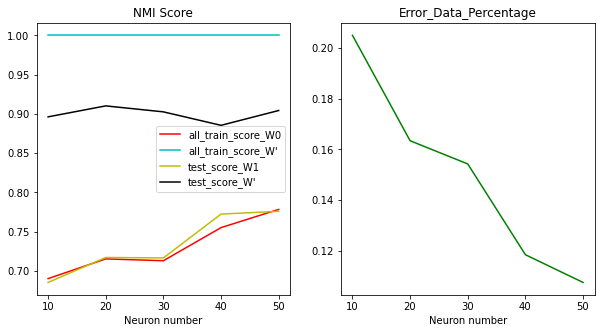

        Variable     N      Mean        SD        SE  95% Conf.  Interval
0  test_score_W0   5.0  0.733394  0.039348  0.017597   0.684538  0.782251
1  test_score_W'   5.0  0.899706  0.009426  0.004215   0.888002  0.911410
2       combined  10.0  0.816550  0.091710  0.029001   0.750945  0.882156
                              Independent t-test  results
0  Difference (test_score_W0 - test_score_W') =   -0.1663
1                          Degrees of freedom =    8.0000
2                                           t =   -9.1912
3                       Two side test p value =    0.0000
4                      Difference < 0 p value =    0.0000
5                      Difference > 0 p value =    1.0000
6                                   Cohen's d =   -5.8130
7                                   Hedge's g =   -5.2504
8                               Glass's delta =   -4.2267
9                                 Pearson's r =    0.9558


C:\Users\fooli\anaconda3\lib\site-packages\researchpy\ttest.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


Ttest_indResult(statistic=-9.19115647218233, pvalue=7.937005184246487e-06)

In [4]:
# multiple text by adding neuron number 
scoretype = 1
scope_num = 5
class_num = 10
dim_num = 22
unstable_repeat_num = 1
unit_list = []    
all_train_score_W0 =[]
all_train_score_W_combine =[]
test_score_W0 = []
test_score_W_combine= []
error_data_percentage = []

all_train_score_W0_global =[]
all_train_score_W_combine_global =[]
test_score_W0_global = []
test_score_W_combine_global = []

p_values = []

y = 1
while y <= unstable_repeat_num:
    x = 1
    while x <= scope_num:
        unit_list.append(class_num*x)
        print("neuron unit number: {}".format(class_num*x))
        print("*******************\n")
        som = newSom.SOM(m= class_num, n= x, dim=dim_num)  
        optimize_W = TDSM_SOM.TDSM_SOM(som,dataread.data_train,dataread.data_test,dataread.label_train,dataread.label_test,class_num)
        optimize_W.run(20,scoretype)
        
        all_train_score_W0.append(optimize_W.all_train_score_W0)
        all_train_score_W_combine.append(optimize_W.all_train_score_W_Combined)
        test_score_W0.append(optimize_W.test_score_W0)
        test_score_W_combine.append(optimize_W.test_score_W_combined)
        error_data_percentage.append(optimize_W.first_error_data_percentage)
        
        all_train_score_W0_global.append(optimize_W.all_train_score_W0)
        all_train_score_W_combine_global.append(optimize_W.all_train_score_W_Combined)
        test_score_W0_global.append(optimize_W.test_score_W0)
        test_score_W_combine_global.append(optimize_W.test_score_W_combined)

        
        x = x+1

    
    figure, axis = plt.subplots(1, 2,figsize=(10, 5))

    if scoretype == 0:
        axis[0].set_title("Purity Score")
    elif scoretype == 1:
        axis[0].set_title("NMI Score")
    elif scoretype == 2:
        axis[0].set_title("ARI Score")
            
    axis[0].set_xlabel('Neuron number')
    axis[0].plot(unit_list,all_train_score_W0,'r',label ='all_train_score_W0')
    axis[0].plot(unit_list,all_train_score_W_combine,'c',label ='all_train_score_W\'')
    axis[0].plot(unit_list,test_score_W0,'y',label ='test_score_W1')
    axis[0].plot(unit_list,test_score_W_combine,'k',label ='test_score_W\'')
    axis[0].legend()
    
    axis[1].set_title("Error_Data_Percentage")
    axis[1].set_xlabel('Neuron number')
    axis[1].plot(unit_list,error_data_percentage,'g')

    plt.show()
    y =y+1
    #reset
    unit_list = []  
    all_train_score_W0 =[]
    all_train_score_W_combine =[]
    test_score_W0 = []
    test_score_W_combine= []
    error_data_percentage = []
    

df1 = pd.DataFrame(test_score_W0_global, columns = ['test_score_W0'])
df2 = pd.DataFrame(test_score_W_combine_global, columns = ['test_score_W\''])

summary, results = rp.ttest(group1= df1['test_score_W0'], group1_name= "test_score_W0",
                            group2= df2['test_score_W\''], group2_name= "test_score_W\'")
print(summary)
print(results)

stats.ttest_ind(test_score_W0_global, test_score_W_combine_global,alternative = 'less')

neuron unit number: 10
*******************

Error Data percentage 0.2876712328767123
right_data0_score_W0 1.0 
error_data0_score_W1 0.3330006688937864 
error_data0_score_W0 0.15740001733848127
combinedweight shape 0: (20, 22)
right_data0_score_W' 0.9573449570365383 
Finish one training *********
1
right_data1_score_W0 1.0 
error_data1_score_W1 0.3273466050609255 
error_data1_score_W0 0.08464325936889172
combinedweight shape1 : (30, 22)
right_data1_score_W' 0.9008314088251995 
Finish one training *********
2
right_data2_score_W0 1.0 
error_data2_score_W1 0.336868004483736 
error_data2_score_W0 0.16518826027012598
combinedweight shape1 : (40, 22)
right_data2_score_W' 0.5940372909778873 
Finish one training *********
3
right_data3_score_W0 1.0 
error_data3_score_W1 0.35621015636487696 
error_data3_score_W0 0.10557772542896289
combinedweight shape1 : (50, 22)
right_data3_score_W' 0.3583286975994155 
Finish one training *********
4
right_data4_score_W0 1.0 
error_data4_score_W1 0.3382880125

right_data1_score_W' 0.7149667325796225 
Finish one training *********
2
right_data2_score_W0 1.0 
error_data2_score_W1 0.8894736842105263 
error_data2_score_W0 -0.11594202898550725
combinedweight shape1 : (280, 22)
right_data2_score_W' 0.44088654765438345 
Finish one training *********
3
right_data3_score_W0 1.0 
error_data3_score_W1 1.0 
error_data3_score_W0 1.0
Error data can be represented by W0 3
combinedweight shape1 : (350, 22)
right_data3_score_W' 0.4932378679395386 
Finish one training *********
4
 NO Error Data, Finish Training!
all_train_score_W0: 0.9209446175471931
all_train_score_W': 1.0
test_score_W0 : 0.9103805492655296
test_score_W': 0.9621575381124617
neuron unit number: 80
*******************

Error Data percentage 0.09033154655548938
right_data0_score_W0 1.0 
error_data0_score_W1 0.6949510019224093 
error_data0_score_W0 0.2139668549013021
combinedweight shape 0: (160, 22)
right_data0_score_W' 0.9476648028660999 
Finish one training *********
1
right_data1_score_W0 1.

Error Data percentage 0.06571371848322415
right_data0_score_W0 1.0 
error_data0_score_W1 0.8468843596496612 
error_data0_score_W0 0.27956859430561576
combinedweight shape 0: (340, 22)
right_data0_score_W' 0.9169138920745328 
Finish one training *********
1
right_data1_score_W0 1.0 
error_data1_score_W1 1.0 
error_data1_score_W0 0.2141039689467526
combinedweight shape1 : (510, 22)
right_data1_score_W' 0.6871827867776851 
Finish one training *********
2
 NO Error Data, Finish Training!
all_train_score_W0: 0.9387125240648851
all_train_score_W': 1.0
test_score_W0 : 0.929243963321621
test_score_W': 0.9702961079136198
neuron unit number: 180
*******************

Error Data percentage 0.06035338495135994
right_data0_score_W0 1.0 
error_data0_score_W1 0.8662788103055421 
error_data0_score_W0 0.22422625629173001
combinedweight shape 0: (360, 22)
right_data0_score_W' 0.9448685928122543 
Finish one training *********
1
right_data1_score_W0 1.0 
error_data1_score_W1 1.0 
error_data1_score_W0 0.236

right_data0_score_W' 0.7905086514280742 
Finish one training *********
1
right_data1_score_W0 1.0 
error_data1_score_W1 0.837537409149209 
error_data1_score_W0 -0.02193630035857414
combinedweight shape1 : (810, 22)
right_data1_score_W' 0.4245477918695098 
Finish one training *********
2
right_data2_score_W0 1.0 
error_data2_score_W1 1.0 
error_data2_score_W0 1.0
Error data can be represented by W0 2
combinedweight shape1 : (1080, 22)
right_data2_score_W' 0.718904109589041 
Finish one training *********
3
 NO Error Data, Finish Training!
all_train_score_W0: 0.9573992403720369
all_train_score_W': 1.0
test_score_W0 : 0.9524196288921281
test_score_W': 0.9754054053944199
neuron unit number: 280
*******************

Error Data percentage 0.04665475481437364
right_data0_score_W0 1.0 
error_data0_score_W1 0.7562011525943526 
error_data0_score_W0 0.1981282579838525
combinedweight shape 0: (560, 22)
right_data0_score_W' 0.7844173953193283 
Finish one training *********
1
right_data1_score_W0 1.0

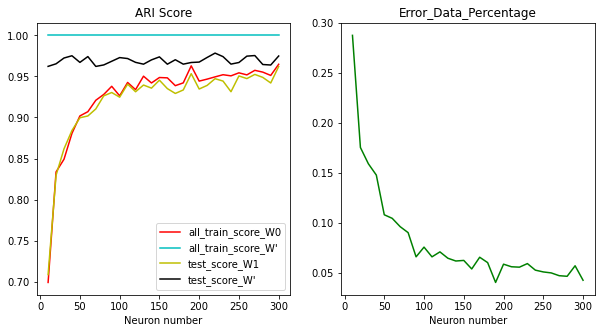

        Variable     N      Mean        SD        SE  95% Conf.  Interval
0  test_score_W0  30.0  0.920686  0.049057  0.008957   0.902368  0.939005
1  test_score_W'  30.0  0.969223  0.004639  0.000847   0.967491  0.970956
2       combined  60.0  0.944955  0.042337  0.005466   0.934018  0.955892
                              Independent t-test  results
0  Difference (test_score_W0 - test_score_W') =   -0.0485
1                          Degrees of freedom =   58.0000
2                                           t =   -5.3951
3                       Two side test p value =    0.0000
4                      Difference < 0 p value =    0.0000
5                      Difference > 0 p value =    1.0000
6                                   Cohen's d =   -1.3930
7                                   Hedge's g =   -1.3749
8                               Glass's delta =   -0.9894
9                                 Pearson's r =    0.5781


C:\Users\fooli\anaconda3\lib\site-packages\researchpy\ttest.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


Ttest_indResult(statistic=-5.395071530559524, pvalue=6.604466147948136e-07)

In [6]:
# multiple text by adding neuron number 
scoretype = 2
scope_num = 30
class_num = 10
dim_num = 22
unstable_repeat_num = 1
unit_list = []    
all_train_score_W0 =[]
all_train_score_W_combine =[]
test_score_W0 = []
test_score_W_combine= []
error_data_percentage = []

all_train_score_W0_global =[]
all_train_score_W_combine_global =[]
test_score_W0_global = []
test_score_W_combine_global = []

p_values = []

y = 1
while y <= unstable_repeat_num:
    x = 1
    while x <= scope_num:
        unit_list.append(class_num*x)
        print("neuron unit number: {}".format(class_num*x))
        print("*******************\n")
        som = newSom.SOM(m= class_num, n= x, dim=dim_num)  
        optimize_W = TDSM_SOM.TDSM_SOM(som,dataread.data_train,dataread.data_test,dataread.label_train,dataread.label_test,class_num)
        optimize_W.run(20,scoretype)
        
        all_train_score_W0.append(optimize_W.all_train_score_W0)
        all_train_score_W_combine.append(optimize_W.all_train_score_W_Combined)
        test_score_W0.append(optimize_W.test_score_W0)
        test_score_W_combine.append(optimize_W.test_score_W_combined)
        error_data_percentage.append(optimize_W.first_error_data_percentage)
        
        all_train_score_W0_global.append(optimize_W.all_train_score_W0)
        all_train_score_W_combine_global.append(optimize_W.all_train_score_W_Combined)
        test_score_W0_global.append(optimize_W.test_score_W0)
        test_score_W_combine_global.append(optimize_W.test_score_W_combined)

        
        x = x+1

    
    figure, axis = plt.subplots(1, 2,figsize=(10, 5))

    if scoretype == 0:
        axis[0].set_title("Purity Score")
    elif scoretype == 1:
        axis[0].set_title("NMI Score")
    elif scoretype == 2:
        axis[0].set_title("ARI Score")
            
    axis[0].set_xlabel('Neuron number')
    axis[0].plot(unit_list,all_train_score_W0,'r',label ='all_train_score_W0')
    axis[0].plot(unit_list,all_train_score_W_combine,'c',label ='all_train_score_W\'')
    axis[0].plot(unit_list,test_score_W0,'y',label ='test_score_W1')
    axis[0].plot(unit_list,test_score_W_combine,'k',label ='test_score_W\'')
    axis[0].legend()
    
    axis[1].set_title("Error_Data_Percentage")
    axis[1].set_xlabel('Neuron number')
    axis[1].plot(unit_list,error_data_percentage,'g')

    plt.show()
    y =y+1
    #reset
    unit_list = []  
    all_train_score_W0 =[]
    all_train_score_W_combine =[]
    test_score_W0 = []
    test_score_W_combine= []
    error_data_percentage = []
    

df1 = pd.DataFrame(test_score_W0_global, columns = ['test_score_W0'])
df2 = pd.DataFrame(test_score_W_combine_global, columns = ['test_score_W\''])

summary, results = rp.ttest(group1= df1['test_score_W0'], group1_name= "test_score_W0",
                            group2= df2['test_score_W\''], group2_name= "test_score_W\'")
print(summary)
print(results)

stats.ttest_ind(test_score_W0_global, test_score_W_combine_global,alternative = 'less')